In [1]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('motorcycle_toy_data')

In [3]:
df.head()

,Unnamed: 0,title,year,price,neighborhood,description,url,model,vin,condition,cryptocurrency,delivery,engine_size,fuel_type,mileage,color,street legal,title status,transmission,bike type
0,0,2016 Honda CBR300r,NaN,2900.0,Auburn,"2016 Honda CBR300r\n6,186 miles as of listing\...",https://auburn.craigslist.org/mcy/d/auburn-uni...,2016 honda cbr300r,NaN,excellent,NaN,NaN,286.0,gas,NaN,yellow,street legal,clean,manual,sport bike
1,1,"BAD CREDIT, NO CREDIT, OK! WE WORK WITH EVERYONE!",NaN,NaN,FAYETTEVILLE,"WE SHIP NATIONWIDE, FINANCE NATIONWIDE! YOU SE...",https://auburn.craigslist.org/mcd/d/fayettevil...,all bikes,NaN,excellent,NaN,NaN,NaN,gas,NaN,NaN,NaN,clean,manual,NaN
2,2,2017 Yamaha FZ 07 very low miles,NaN,5000.0,Near Montgomery,"2017 Yamaha FZ-07 with only 1100 miles, bike i...",https://auburn.craigslist.org/mcy/d/montgomery...,2017 Yamaha FZ-07,NaN,like new,NaN,NaN,700.0,gas,1100.0,silver,NaN,clean,manual,street
3,3,2010 Yellow Goldwing GL1800 CSC(see pics/price...,NaN,NaN,NaN,2010 Yellow GL1800 CSC Viper\n\nLOOK!!! only 8...,https://auburn.craigslist.org/mcd/d/haleyville...,2010 Honda GL1800 CSC,NaN,like new,NaN,NaN,1832.0,gas,8209.0,yellow,NaN,clean,manual,"trike<p class=""attrgroup"">\n<span class=""other..."
4,4,2006 Honda XR650L *Price Drop*,NaN,3800.0,Auburn,"2006 Honda XR650L \n\n8,000 miles. This number...",https://auburn.craigslist.org/mcy/d/auburn-200...,2006 honda xr650l,NaN,excellent,NaN,NaN,650.0,gas,8100.0,red,street legal,clean,manual,dual-sport


Text(0.5, 1.0, 'years plotted by row')

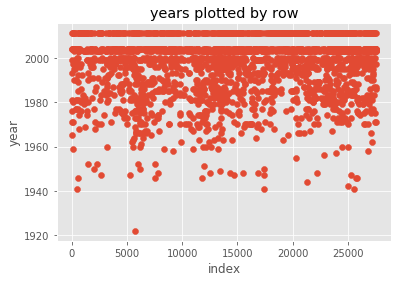

In [4]:
plt.scatter(df.index, df['year'])
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [5]:
for idx, _ in enumerate(df['year']):
    if _ > 2018:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    elif _ < 1920:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    else:
        pass

/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'years plotted by row')

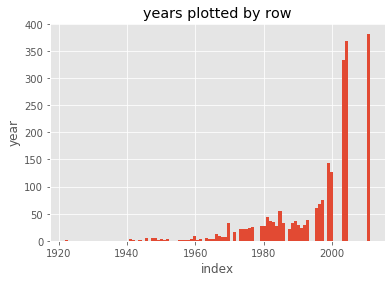

In [6]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [8]:
year_real_mean = df['year'].mean()
year_real_mean

1995.8261997405966

In [10]:
df['year'].fillna(year_real_mean, inplace=True)

Text(0.5, 1.0, 'years plotted by row')

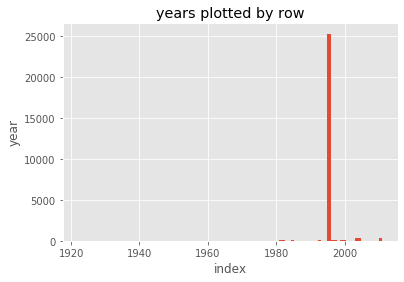

In [11]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      27562 non-null  int64  
 1   title           27558 non-null  object 
 2   year            27562 non-null  float64
 3   price           26654 non-null  float64
 4   neighborhood    24588 non-null  object 
 5   description     27559 non-null  object 
 6   url             27562 non-null  object 
 7   model           27562 non-null  object 
 8   vin             9633 non-null   object 
 9   condition       16619 non-null  object 
 10  cryptocurrency  150 non-null    object 
 11  delivery        1642 non-null   object 
 12  engine_size     10821 non-null  float64
 13  fuel_type       25462 non-null  object 
 14  mileage         20065 non-null  float64
 15  color           17789 non-null  object 
 16  street legal    6261 non-null   object 
 17  title status    21732 non-null 

In [18]:
pd.series.(df['vin:']).unique()

SyntaxError: invalid syntax (<ipython-input-18-7568c00275bc>, line 1)